In [23]:
import wradlib as wrl
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

bin_file_name_prefix = "raa01-yw2017.002_10000-"
img_file_name_prefix = "scaled_"

# Subdirectories with years
image_dir="/grossePlatte/Radardaten/PNG/"
data_dir="/grossePlatte/Radardaten/"

year=2016
month=8
day_begin=12
day_end=16

In [24]:
def get_filename_prefix(year, month, day):
    date_string_w_full_year = "{:4d}{:02d}{:02d}".format(year, month, day)
    return date_string_w_full_year[2:]

In [25]:
def read_data_from_radolan(radfile):
    radfile = wrl.util.get_wradlib_data_file(radfile)
    data, attrs = wrl.io.read_radolan_composite(radfile)
    data = np.ma.masked_equal(data, -9999)
    return data

In [26]:
def read_image_gray(image_file):
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [27]:
def get_all_binary_data_in_range(year, month, day_begin, day_end):
    os.environ["WRADLIB_DATA"] = data_dir + str(year) + "/"
    os.chdir(data_dir + str(year) + "/")
    bin_data = np.array([])
    for day in range(day_begin, day_end):
        filename_prefix = bin_file_name_prefix + get_filename_prefix(year, month, day)
        for file in glob.glob(filename_prefix + "*"):
            try:
                data = read_data_from_radolan(file).flatten()
                bin_data = np.append(bin_data, data.flatten())
            except OSError as e:
                print("Could not read file: " + str(e))
    return bin_data

def get_all_image_data_in_range(year, month, day_begin, day_end):
    os.chdir(image_dir + str(year) + "/")
    img_data = np.array([])
    for day in range(day_begin, day_end):
        filename_prefix = img_file_name_prefix + get_filename_prefix(year, month, day)
        for file in glob.glob(filename_prefix + "*"):
            image = read_image_gray(file)
            img_data = np.append(img_data, image)
    return img_data

In [ ]:
print("Raw data:")
bin_data = get_all_binary_data_in_range(year, month, day_begin, day_end)
print(type(bin_data))
print(len(bin_data))
print("{} / {}".format(bin_data.min(), bin_data.max()))

print("Image data:")
img_data = get_all_image_data_in_range(year, month, day_begin, day_end)
print(type(img_data))
print(len(img_data))
print("{} / {}".format(img_data.min(), img_data.max()))

Raw data:


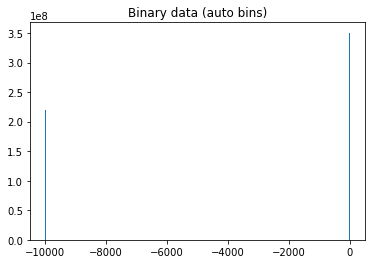

In [21]:
#hist, bin_edges = np.histogram(bin_data, density=True)
plt.hist(bin_data, bins='auto', histtype='bar')  # arguments are passed to np.histogram
plt.title("Binary data (auto bins)")
plt.show()

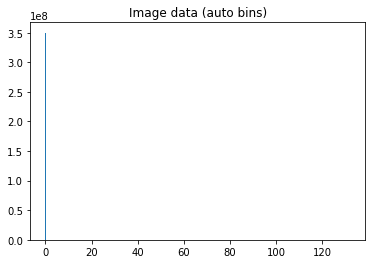

In [22]:
plt.hist(img_data.flatten(), bins='auto')  # arguments are passed to np.histogram
plt.title("Image data (auto bins)")
plt.show()

In [ ]:
img_data.shape

### Edits:
* eindimensionales Histogramm ist oft einfacher zu interpretieren:
    -> unterschiede werden sichtbar, aber auch die Masked eigenschaft ist eher negativ zum Auswerten des Arrays, daher clipping
* Forschleife die gesammtes Bild durchsucht macht unterschiedliche Wertebereiche nochmal sichtbar.
* Schlussendlich gilt noch zu klären, ob überhaupt das selbe Bild verglichen wird, imshow sieht durchaus sehr unterschiedlich aus
    

In [ ]:
plt.hist(img_data[500], bins=20, log=True)  # arguments are passed to np.histogram
plt.title("Image data (Zeile 500)")
plt.show()
plt.hist(bin_data[500], bins=20, log=True)  # arguments are passed to np.histogram
plt.title("Binary data (Zeile 500)")
plt.show()
###
print("\n\n\n")
plt.hist(img_data.flatten(), bins=20, log=True)  # arguments are passed to np.histogram
plt.title("Image data flattened (auto bins)")
plt.show()
clipped_bin = bin_data.flatten()
clipped_bin[clipped_bin<-1000] = 0
plt.hist(clipped_bin, bins=20, log=True)  # arguments are passed to np.histogram
plt.title("Binary data flattened (auto bins)")
plt.show()
print(img_data[500])

In [ ]:
img_a = {}
for i in range(1100):
    for j in range(900):
        if img_data[i][j] in img_a:
            img_a[img_data[i][j]] += 1
            continue
        img_a[img_data[i][j]] = 1
print(img_a)

bin_a = []
for i in range(1100):
    for j in range(900):
        if bin_data[i][j] in bin_a:
            continue
        
        bin_a.append(bin_data[i][j])
print(bin_a)
print(len(bin_a))


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_data, cmap="gray", vmax=80)
plt.show()
plt.imshow(bin_data, cmap="gray", vmax=1)
plt.show()

